In [81]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

1b

In [68]:
def Eulermethod(h):
    x_0 = 100
    x = [x_0]
    t_list = [0]
    t = 0
    while t < 10:
        x_n = x[-1]
        x_nplus1 = x_n + (h / 8) * (5 - x_n - 5025 * np.exp(-8 * t))
        t += h
        x.append(x_nplus1)
        t_list.append(t)
    return x, t_list

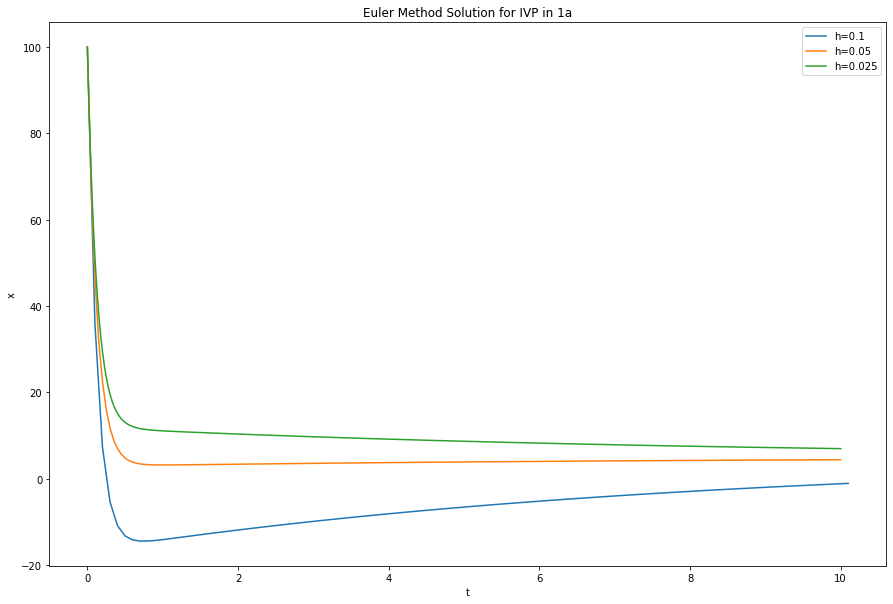

In [69]:
plt.figure(figsize=(15,10))
for h in [0.1,0.05, 0.025]:
    x, t_list = Eulermethod(h)
    plt.plot(t_list, x, label = f"h={h}")
plt.title("Euler Method Solution for IVP in 1a")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

1c

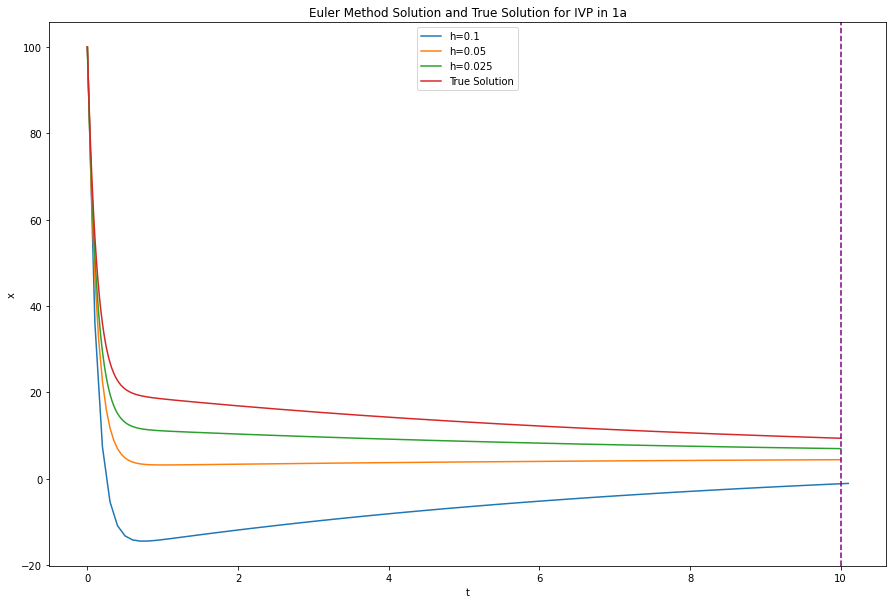

In [193]:
plt.figure(figsize=(15,10))
x_10 = []
for h in [0.1,0.05, 0.025]:
    x, t_list = Eulermethod(h)
    x_10.append(x[-1])
    plt.plot(t_list, x, label = f"h={h}")
plt.title("Euler Method Solution and True Solution for IVP in 1a")
plt.xlabel("t")
plt.ylabel("x")
t = np.linspace(0,10,10000)
x = lambda t: (5/21) * (335 * np.exp(-8 * t) + 64 * np.exp(-t/8) + 21)
plt.plot(t, x(t), label = "True Solution")
plt.legend()
plt.axvline(10, c = 'purple', linestyle = '--')
plt.show()

In [107]:
table = np.array([["h", 0.1, 0.05, 0.025], ["|e_N|"] + list(abs(np.array(x_10 - x(10))))]).T
print(tabulate(table, tablefmt="grid"))

+-------+--------------------+
| h     | |e_N|              |
+-------+--------------------+
| 0.1   | 10.461190676644826 |
+-------+--------------------+
| 0.05  | 4.966152138155016  |
+-------+--------------------+
| 0.025 | 2.4066008156698206 |
+-------+--------------------+


2b

In [149]:
def TS3(h):
    y_0 = [1, 0]
    y = np.array([y_0])
    t_list = [0]
    t = 0
    while t < 3:
        y_n = y[-1]
        u, v = y_n
        u_p = v
        v_p = t ** 2 - 2 * u - 3 * v
        u_pp = v_p
        v_pp = 2 * t - u_p - 3 * v_p
        f = np.array([v, t ** 2 - 2 * u - 3 * v])
        f_p = np.array([v_p, 2 * t - 2 * u_p - 3 * v_p])
        f_pp = np.array([v_pp, 2 - 2 * u_pp - 3 * v_pp])
        y_nplus1 = y_n + h * f + (h ** 2 / 2) * f_p + (h ** 3 / 6) * f_pp
        t += h
        y = np.concatenate((y,np.array([y_nplus1])))
        t_list.append(t)
    return y[:,0], t_list

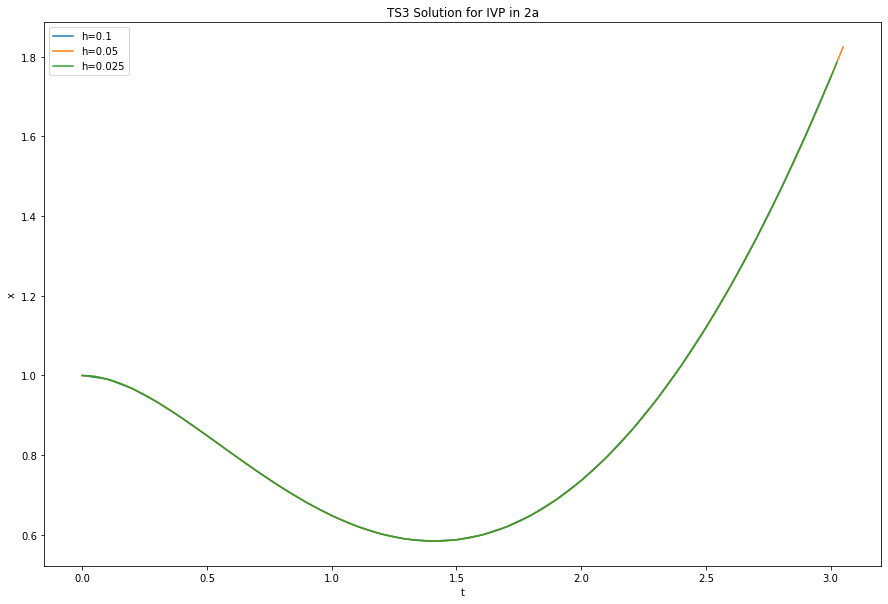

In [150]:
plt.figure(figsize=(15,10))
for h in [0.1,0.05, 0.025]:
    x, t_list = TS3(h)
    plt.plot(t_list, x, label = f"h={h}")
plt.title("TS3 Solution for IVP in 2a")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.show()

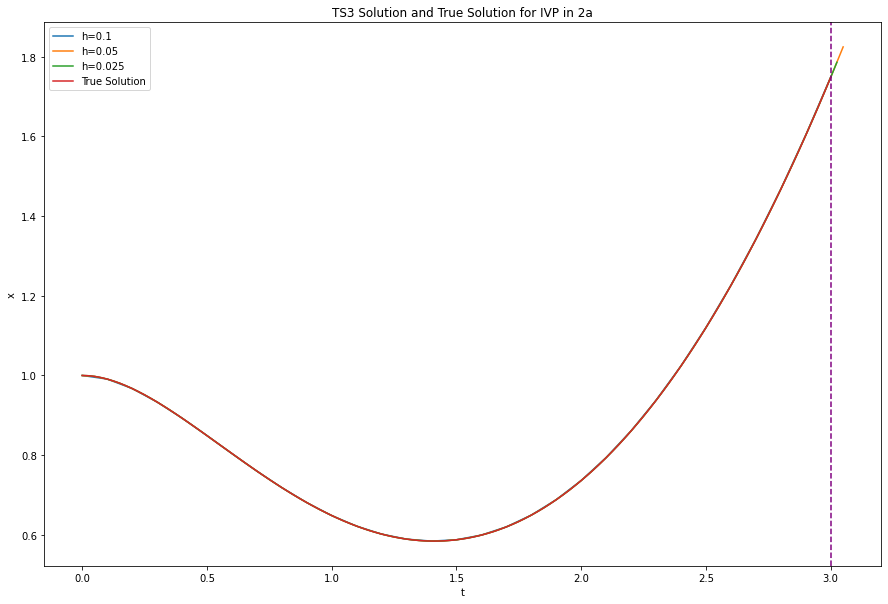

In [192]:
plt.figure(figsize=(15,10))
x_3 = []
for h in [0.1,0.05, 0.025]:
    x, t_list = TS3(h)
    x_3.append(x[-1])
    plt.plot(t_list, x, label = f"h={h}")
plt.title("TS3 Solution and True Solution for IVP in 2a")
plt.xlabel("t")
plt.ylabel("x")
t = np.linspace(0,3,10000)
x_func = lambda t: (2 * t ** 2 - 6 * t - 3 * np.exp(-2 * t) + 7) / 4
plt.plot(t, x_func(t), label = "True Solution")
plt.legend()
plt.axvline(3, c = 'purple', linestyle = '--')
plt.show()

In [191]:
table = [["N","h","|e_N|"]]
e_n = np.inf
n = 1
while n < 30:
    h = 3 / n
    x, t = TS3(h)
    e_n = abs(x[-1] - x_func(3))
    n += 1
    if e_n < 10e-3:
        table.append([n, h, e_n])
print(tabulate(table, tablefmt="grid"))

+----+---------------------+-----------------------+
| N  | h                   | |e_N|                 |
+----+---------------------+-----------------------+
| 10 | 0.3333333333333333  | 0.009459484208271585  |
+----+---------------------+-----------------------+
| 13 | 0.25                | 0.004937837225500896  |
+----+---------------------+-----------------------+
| 14 | 0.23076923076923078 | 0.004124079097300948  |
+----+---------------------+-----------------------+
| 15 | 0.21428571428571427 | 0.003492448864515163  |
+----+---------------------+-----------------------+
| 16 | 0.2                 | 0.0029931336954396315 |
+----+---------------------+-----------------------+
| 17 | 0.1875              | 0.002592072402723966  |
+----+---------------------+-----------------------+
| 20 | 0.15789473684210525 | 0.001771310901792944  |
+----+---------------------+-----------------------+
| 24 | 0.13043478260869565 | 0.0011648955745104939 |
+----+---------------------+------------------

4d

In [219]:
def AB3(h, X_0, X_1, X_2):
    X = np.array([X_0,X_1,X_2])
    t_list = [0, h, 2*h, ]
    t = 3*h
    while t < 100:
        X_n = X[-1]
        x_n, y_n, z_n = X_n
        X_nminus1 = X[-2]
        x_nminus1, y_nminus1, z_nminus1 = X_nminus1
        X_nminus2 = X[-3]
        x_nminus2, y_nminus2, z_nminus2 = X_nminus2
        fn = np.array([10 * (y_n - x_n), x_n * (28 - z_n) - y_n, x_n * y_n - (8 / 3) * z_n])
        fnminus1 = np.array([10 * (y_nminus1 - x_nminus1), x_nminus1 * (28 - z_nminus1) - y_nminus1, x_nminus1 * y_nminus1 - (8 / 3) * z_nminus1])
        fnminus2 = np.array([10 * (y_nminus2 - x_nminus2), x_nminus2 * (28 - z_nminus2) - y_nminus2, x_nminus2 * y_nminus2 - (8 / 3) * z_nminus2])
        X_nplus1 = X_n + (h / 12) * (23 * fn - 16 * fnminus1 + 5 * fnminus2)
        X = np.concatenate((X,np.array([X_nplus1])))
        t_list.append(t)
        t += h
    return X, t_list

In [220]:
def initialise(h, X_0):
    X = np.array([X_0])
    for i in range(2):
        X_n = X[-1]
        x_n, y_n, z_n = X_n
        fn = np.array([10 * (y_n - x_n), x_n * (28 - z_n) - y_n, x_n * y_n - (8 / 3) * z_n])
        X_nplus1 = X_n + h * fn
        X = np.concatenate((X,np.array([X_nplus1])))
    return X

In [221]:
X_0, X_1, X_2 = initialise(0.01,[1,1,1])
X, t_list = AB3(0.01, X_0, X_1, X_2)

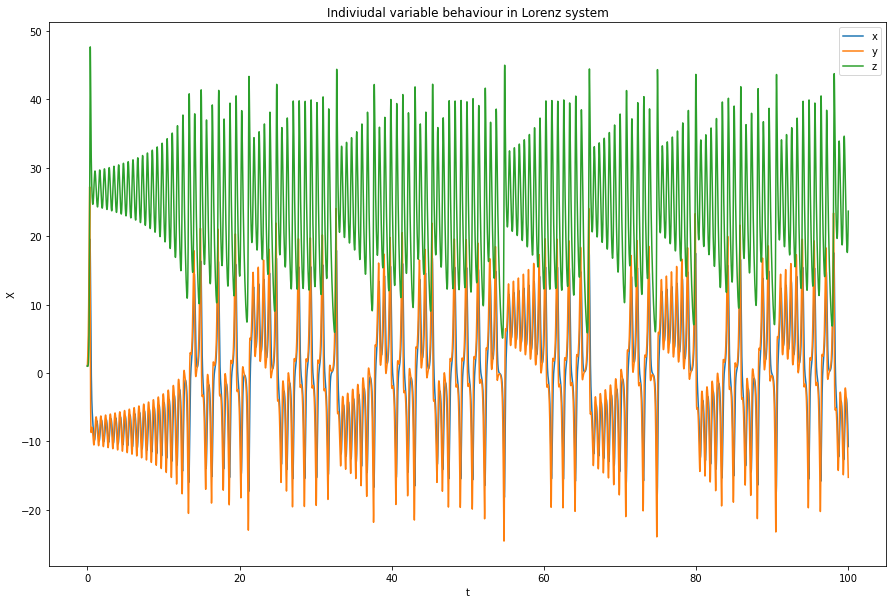

In [244]:
plt.figure(figsize=(15,10))
h = 0.01
plt.plot(t_list, X[:,0], label = "x")
plt.plot(t_list, X[:,1], label = "y")
plt.plot(t_list, X[:,2], label = "z")
plt.title("")
plt.xlabel("t")
plt.ylabel("X")
plt.legend()
plt.title("Indiviudal variable behaviour in Lorenz system")
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


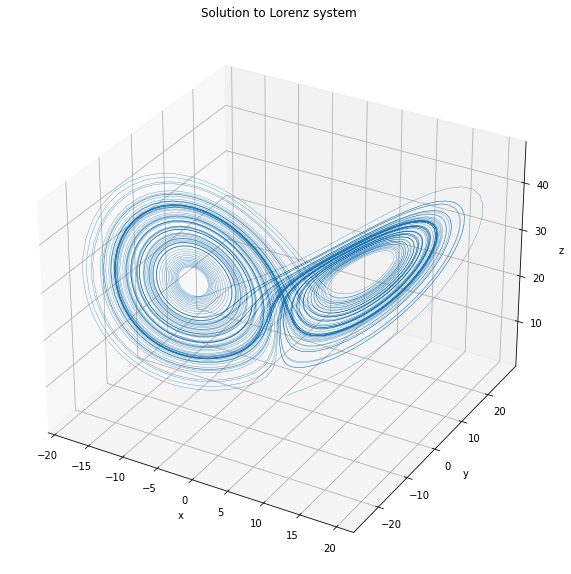

In [243]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot(X[:,0], X[:,1], X[:,2], lw = 0.3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Solution to Lorenz system")
plt.show()